<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Ваша функция, которую будем подгонять
def model(X, Q, a):
    Цена, Дистр = X
    return np.exp(Цена * Q) * a * Дистр

# Данные
data = {
    'Цена': [555.1275024875212,563.5121273151073,560.3736274992839,562.6197391460528,563.5582276125425,562.1582378046487,554.8967423946194,565.7121404120832,572.1274990652037,581.8351869449383,601.0044376731425,614.9274965455355],
    'СС': [179.77, 185.22, 183.18, 184.64, 185.25, 184.34, 179.62, 186.65, 190.82, 197.13, 209.59, 218.64],
    'Дистр': [0.9999999995214874,0.9999999994868709,0.9999999995082555,0.9999999994970667,0.9999999995073376,0.9999999994813484,0.999999999534876,0.9999999994765731,0.9999999994600289,0.999999999418635,0.9999999994264289,0.9999999992020011],
    'Обьем': [18639.927758369595,17527.82352928097,17936.112007717467,17642.959643747115,17521.896111724418,17702.79903067726,18671.5126868092,17247.17662571538,16454.190537216833,15323.026961195754,13312.661524498648,12019.91357404251]
}

df = pd.DataFrame(data)

# Входные данные для curve_fit
X = np.array([df['Цена'], df['Дистр']])
y = np.array(df['Обьем'])

# Начальные предположения для Q и a
initial_guess = [0.01, 1]

# Подгонка модели к данным
popt, pcov = curve_fit(model, X, y, p0=initial_guess)

# Оптимальные значения Q и a
Q_opt, a_opt = popt

print("Оптимальное значение Q:", Q_opt)
print("Оптимальное значение a:", a_opt)


Оптимальное значение Q: -0.007336809999999991
Оптимальное значение a: 1094629.1899999948


In [7]:
df

,Цена,СС,Дистр,Обьем
0,555.127502,179.77,1.0,18639.927758
1,563.512127,185.22,1.0,17527.823529
2,560.373627,183.18,1.0,17936.112008
3,562.619739,184.64,1.0,17642.959644
4,563.558228,185.25,1.0,17521.896112
5,562.158238,184.34,1.0,17702.799031
6,554.896742,179.62,1.0,18671.512687
7,565.712140,186.65,1.0,17247.176626
8,572.127499,190.82,1.0,16454.190537
9,581.835187,197.13,1.0,15323.026961


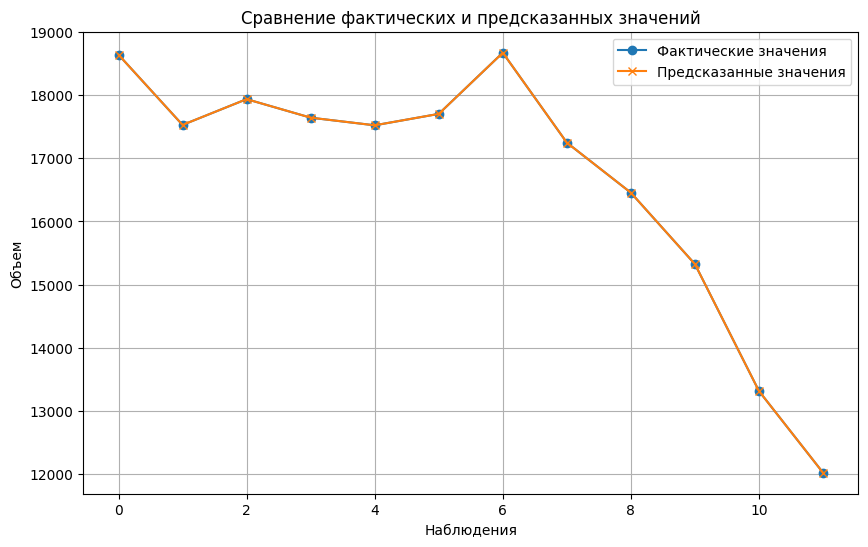

Оптимальное значение Q: -0.007336809999999991
Оптимальное значение a: 1094629.1899999948
R²: 1.0000


In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Q_opt, a_opt = popt

# Предсказанные значения с использованием оптимальных Q и a
y_pred = model(X, Q_opt, a_opt)

# Вычисление R²
r2 = r2_score(y, y_pred)

# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.plot(y, label='Фактические значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Наблюдения')
plt.ylabel('Объем')
plt.legend()
plt.grid(True)
plt.show()

# Печать результатов
print(f"Оптимальное значение Q: {Q_opt}")
print(f"Оптимальное значение a: {a_opt}")
print(f"R²: {r2:.4f}")

In [40]:
import pandas as pd

data = {
    'retailer': ['LENTA'] * 26,
    'group_name': ['Сыр плавленый'] * 26,
    'format_tt': ['Супермаркет'] * 26,
    'region': ['Центральный федеральный округ'] * 26,
    'SKU': ['Сыр плавленый Карат Волна Блочки 90 г 45,0%'] * 26,
    'Brand': ['Карат'] * 26,
    'Manufacture': ['KARAT'] * 26,
    'SALES VOL': [15.4, 65.1, 211.8, 459.6, 547.6, 272.5, 369, 662.8, 1334.9, 325.7, 420.6, 1043.5, 1038.1, 1007.8, 981.6, 1022, 1591.6, 1122.1, 1015.7, 916.7, 809.7, 1046.9, 1117.1, 1181, 1181, 1181],
    'PRICE PER UNIT': [445.1, 444.8, 444.5, 444.2, 444.2, 456.2, 410.9, 341.1, 349.1, 458.4, 392.7, 399, 453.6, 483.9, 474.6, 464.9, 472.3, 461.7, 426.6, 453.8, 468.1, 455.1, 447.1, 476.7, 476.7, 476.7],
    'WEIGHTED DISTR': [0, 0.1, 0.3, 0.3, 0.3, 0.3, 0.4, 0.6, 0.9, 0.8, 0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9],
    'Data_month': ['2024-4', '2024-3', '2024-2', '2024-1', '2023-12', '2023-11', '2023-10', '2023-9', '2023-8', '2023-7', '2023-6', '2023-5', '2023-4', '2023-3', '2023-2', '2023-1', '2022-12', '2022-11', '2022-10', '2022-9', '2022-8', '2022-7', '2022-6', '2022-5', '2022-5', '2022-5']
}

df = pd.DataFrame(data)
df[['SALES VOL','PRICE PER UNIT','WEIGHTED DISTR','Data_month']]

,SALES VOL,PRICE PER UNIT,WEIGHTED DISTR,Data_month
0,15.4,445.1,0.0,2024-4
1,65.1,444.8,0.1,2024-3
2,211.8,444.5,0.3,2024-2
3,459.6,444.2,0.3,2024-1
4,547.6,444.2,0.3,2023-12
5,272.5,456.2,0.3,2023-11
6,369.0,410.9,0.4,2023-10
7,662.8,341.1,0.6,2023-9
8,1334.9,349.1,0.9,2023-8
9,325.7,458.4,0.8,2023-7


In [41]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Ваша функция, которую будем подгонять
def model(X, Q, a):
    Цена, Дистр = X
    return np.exp(Цена * Q) * a * Дистр

# # Данные
# data = {
#     'Цена': [555.1275024875212,563.5121273151073,560.3736274992839,562.6197391460528,563.5582276125425,562.1582378046487,554.8967423946194,565.7121404120832,572.1274990652037,581.8351869449383,601.0044376731425,614.9274965455355],
#     'СС': [179.77, 185.22, 183.18, 184.64, 185.25, 184.34, 179.62, 186.65, 190.82, 197.13, 209.59, 218.64],
#     'Дистр': [0.9999999995214874,0.9999999994868709,0.9999999995082555,0.9999999994970667,0.9999999995073376,0.9999999994813484,0.999999999534876,0.9999999994765731,0.9999999994600289,0.999999999418635,0.9999999994264289,0.9999999992020011],
#     'Обьем': [18639.927758369595,17527.82352928097,17936.112007717467,17642.959643747115,17521.896111724418,17702.79903067726,18671.5126868092,17247.17662571538,16454.190537216833,15323.026961195754,13312.661524498648,12019.91357404251]
# }

# df = pd.DataFrame(data)

# Входные данные для curve_fit
X = np.array([df['PRICE PER UNIT'], df['WEIGHTED DISTR']])
y = np.array(df['SALES VOL'])

# Начальные предположения для Q и a
initial_guess = [0.01, 1]

# Подгонка модели к данным
popt, pcov = curve_fit(model, X, y, p0=initial_guess)

# Оптимальные значения Q и a
Q_opt, a_opt = popt

print("Оптимальное значение a:", Q_opt)
print("Оптимальное значение Q:", a_opt)


Оптимальное значение a: -0.00013465131420223482
Оптимальное значение Q: 1277.3682183415438


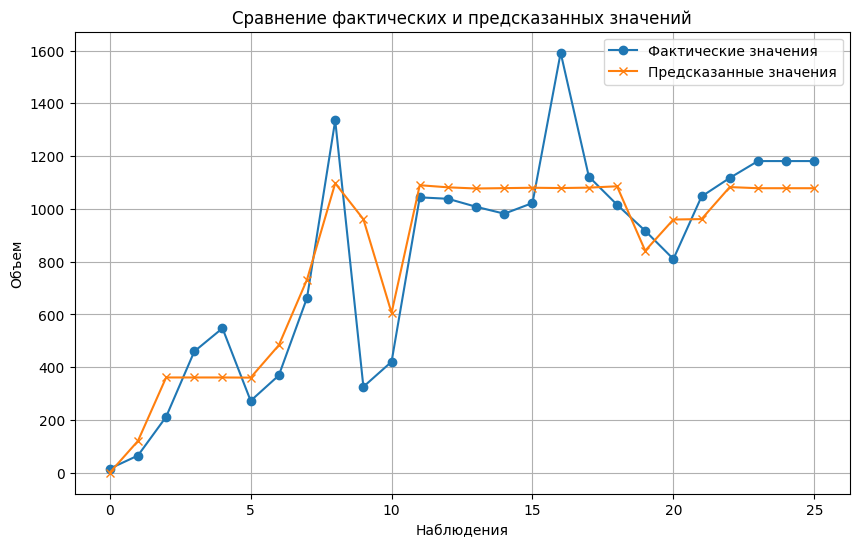

Оптимальное значение a: -0.00013465131420223482
Оптимальное значение Q: 1277.3682183415438
R²: 0.7865


In [42]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Q_opt, a_opt = popt

# Предсказанные значения с использованием оптимальных Q и a
y_pred = model(X, Q_opt, a_opt)

# Вычисление R²
r2 = r2_score(y, y_pred)

# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.plot(y, label='Фактические значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Наблюдения')
plt.ylabel('Объем')
plt.legend()
plt.grid(True)
plt.show()

# Печать результатов
print(f"Оптимальное значение a: {Q_opt}")
print(f"Оптимальное значение Q: {a_opt}")
print(f"R²: {r2:.4f}")

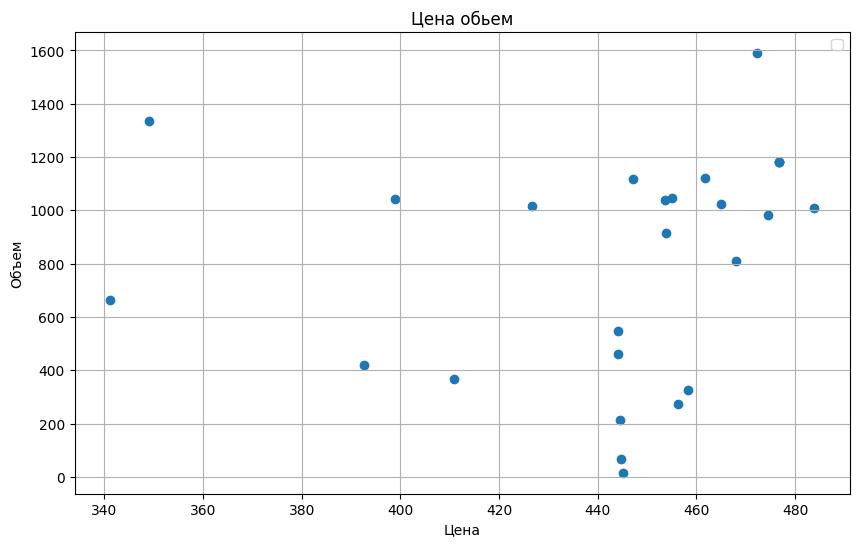

In [43]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(df['PRICE PER UNIT'].tolist(), df['SALES VOL'].tolist(), marker='o')
# plt.plot(df['SALES VOL'], label='обьем', marker='x')
plt.title('Цена обьем')
plt.xlabel('Цена')
plt.ylabel('Объем')
plt.legend()
plt.grid(True)
plt.show()

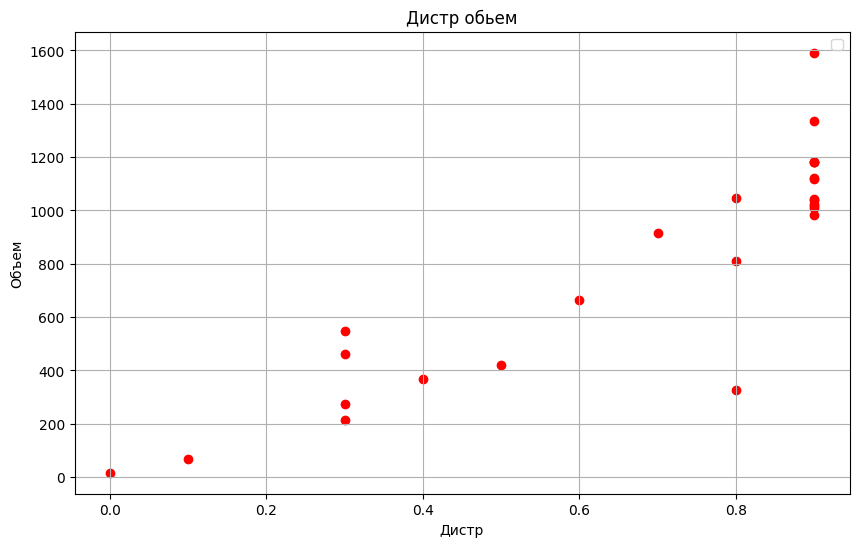

In [44]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(df['WEIGHTED DISTR'].tolist(), df['SALES VOL'].tolist(), marker='o',color='red')
# plt.scatter(df['PRICE PER UNIT'].tolist(), df['SALES VOL'].tolist(), marker='o')
plt.title('Дистр обьем')
plt.xlabel('Дистр')
plt.ylabel('Объем')
plt.legend()
plt.grid(True)
plt.show()

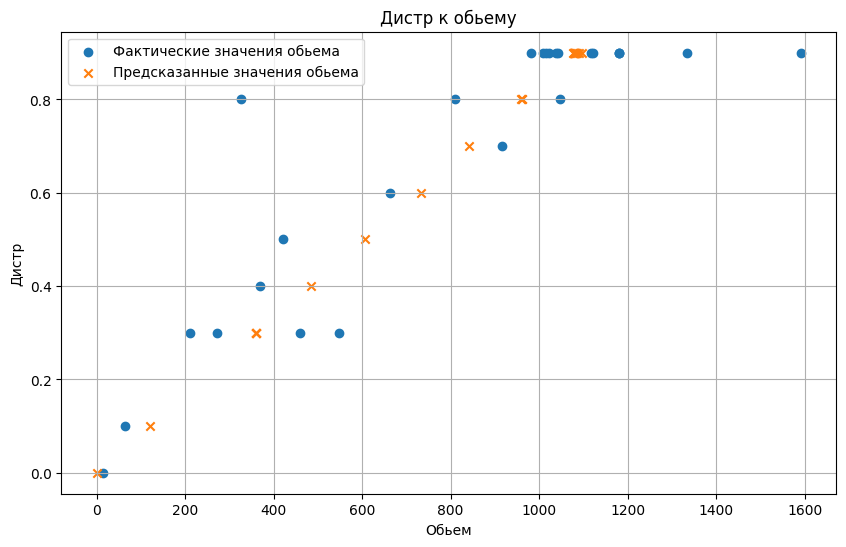

Оптимальное значение a: -0.00013465131420223482
Оптимальное значение Q: 1277.3682183415438
R²: 0.7865


In [45]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y.tolist(),df['WEIGHTED DISTR'].tolist(), label='Фактические значения обьема', marker='o')
plt.scatter(y_pred.tolist(),df['WEIGHTED DISTR'].tolist(), label='Предсказанные значения обьема', marker='x')
plt.title('Дистр к обьему')
plt.xlabel('Обьем')
plt.ylabel('Дистр')
plt.legend()
plt.grid(True)
plt.show()

# Печать результатов
print(f"Оптимальное значение a: {Q_opt}")
print(f"Оптимальное значение Q: {a_opt}")
print(f"R²: {r2:.4f}")

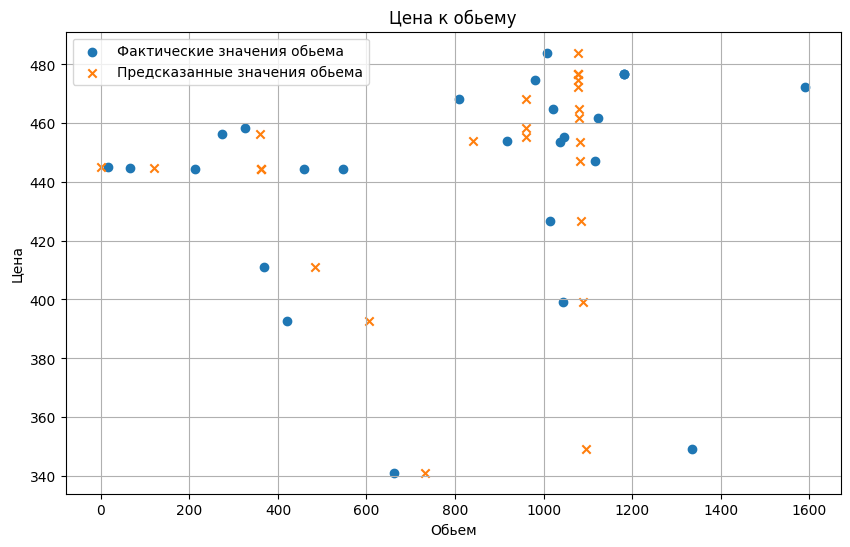

Оптимальное значение a: -0.00013465131420223482
Оптимальное значение Q: 1277.3682183415438
R²: 0.7865


In [52]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y.tolist(),df['PRICE PER UNIT'].tolist(), label='Фактические значения обьема', marker='o')
plt.scatter(y_pred.tolist(),df['PRICE PER UNIT'].tolist(), label='Предсказанные значения обьема', marker='x')
plt.title('Цена к обьему')
plt.xlabel('Обьем')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

# Печать результатов
print(f"Оптимальное значение a: {Q_opt}")
print(f"Оптимальное значение Q: {a_opt}")
print(f"R²: {r2:.4f}")

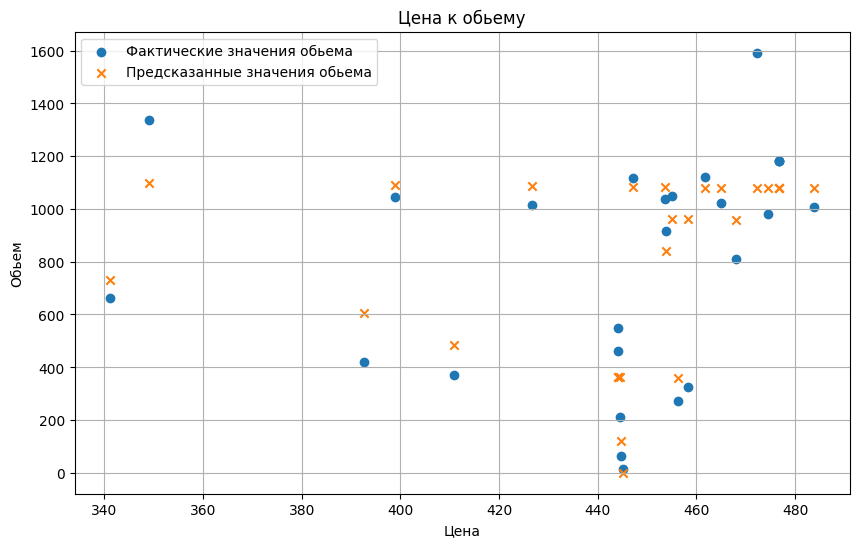

Оптимальное значение a: -0.00013465131420223482
Оптимальное значение Q: 1277.3682183415438
R²: 0.7865


In [53]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(df['PRICE PER UNIT'].tolist(),y.tolist(), label='Фактические значения обьема', marker='o')
plt.scatter(df['PRICE PER UNIT'].tolist(),y_pred.tolist(), label='Предсказанные значения обьема', marker='x')
plt.title('Цена к обьему')
plt.xlabel('Цена')
plt.ylabel('Обьем')
plt.legend()
plt.grid(True)
plt.show()

# Печать результатов
print(f"Оптимальное значение a: {Q_opt}")
print(f"Оптимальное значение Q: {a_opt}")
print(f"R²: {r2:.4f}")

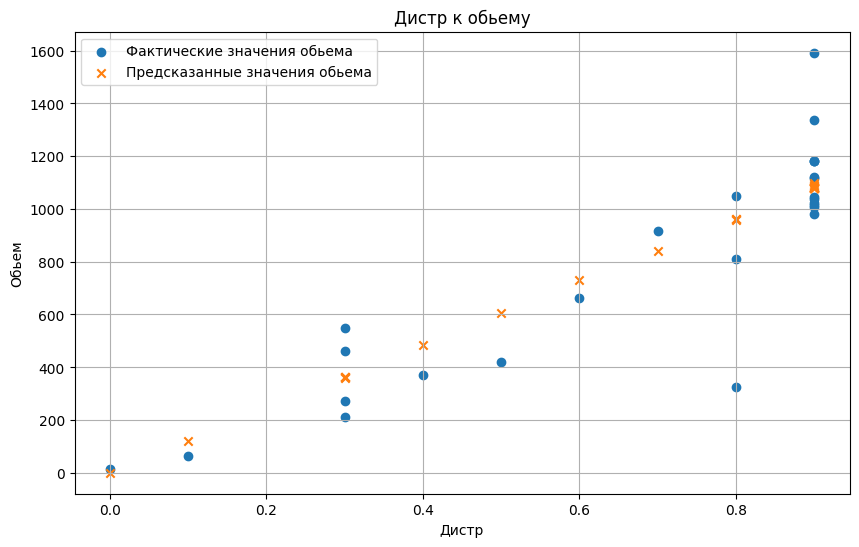

Оптимальное значение a: -0.00013465131420223482
Оптимальное значение Q: 1277.3682183415438
R²: 0.7865


In [48]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(df['WEIGHTED DISTR'].tolist(),y.tolist(), label='Фактические значения обьема', marker='o')
plt.scatter(df['WEIGHTED DISTR'].tolist(),y_pred.tolist(), label='Предсказанные значения обьема', marker='x')
plt.title('Дистр к обьему')
plt.xlabel('Дистр')
plt.ylabel('Обьем')
plt.legend()
plt.grid(True)
plt.show()

# Печать результатов
print(f"Оптимальное значение a: {Q_opt}")
print(f"Оптимальное значение Q: {a_opt}")
print(f"R²: {r2:.4f}")

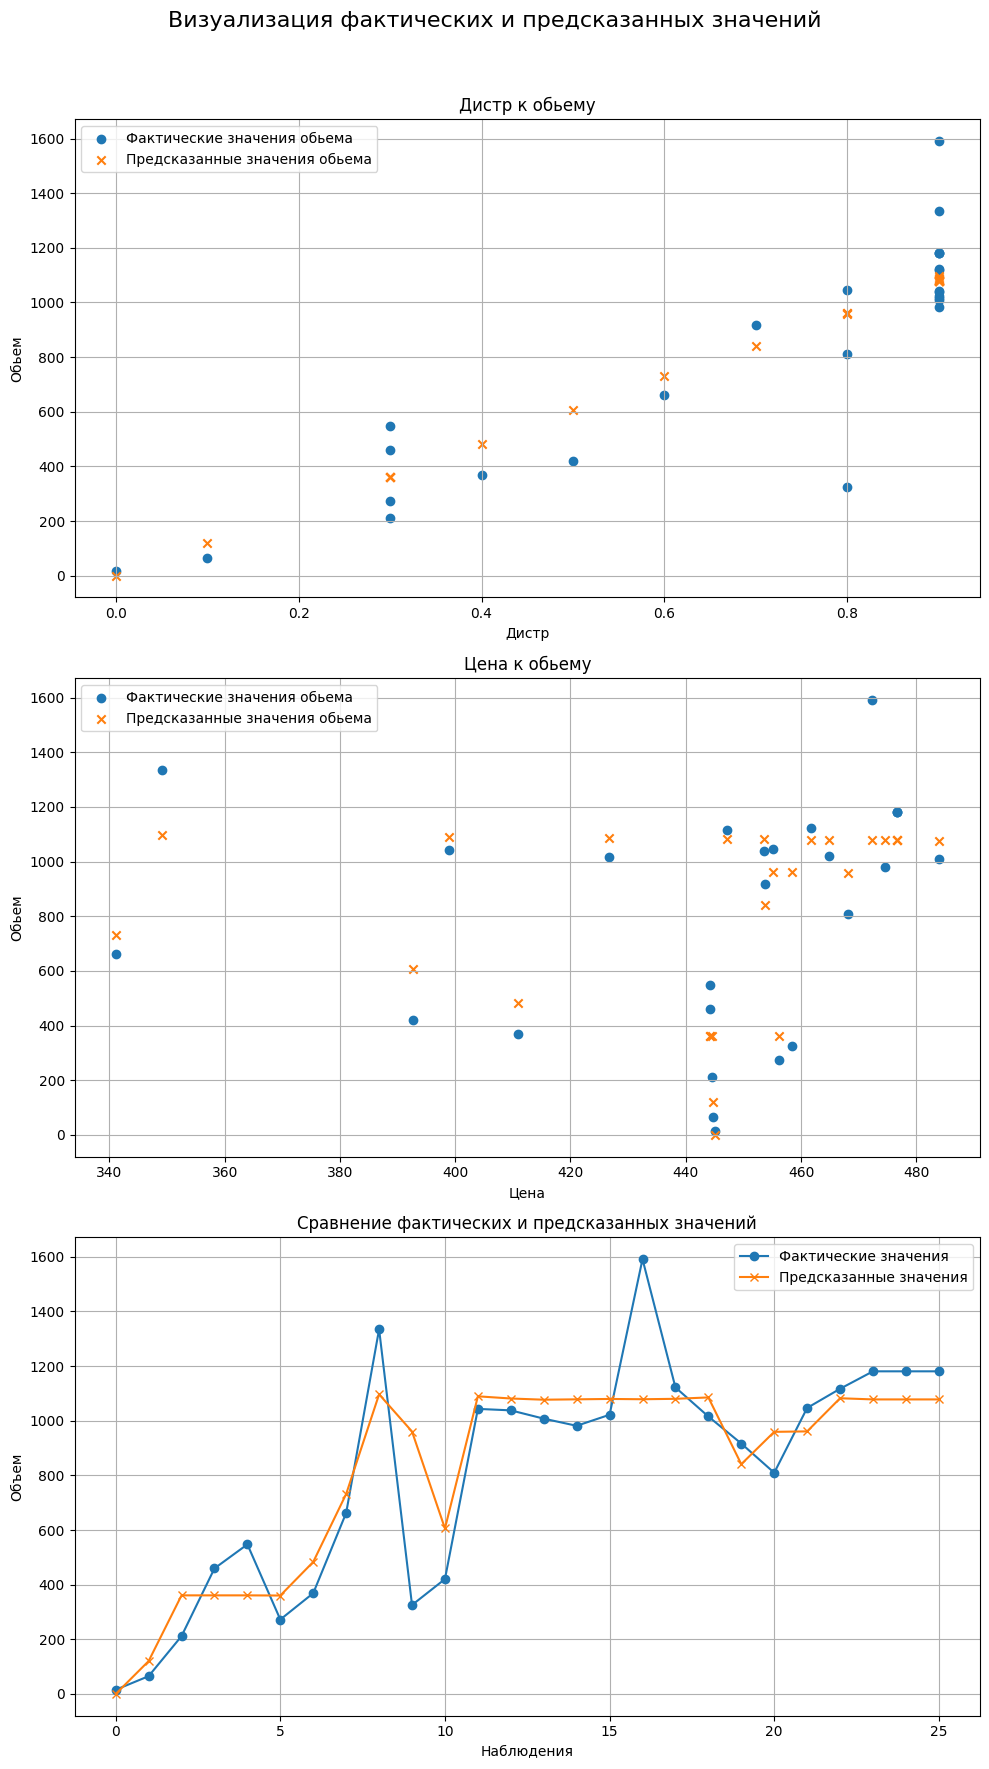

In [54]:

import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Первый график
axes[0].scatter(df['WEIGHTED DISTR'].tolist(), y.tolist(), label='Фактические значения обьема', marker='o')
axes[0].scatter(df['WEIGHTED DISTR'].tolist(), y_pred.tolist(), label='Предсказанные значения обьема', marker='x')
axes[0].set_title('Дистр к обьему')
axes[0].set_xlabel('Дистр')
axes[0].set_ylabel('Обьем')
axes[0].legend()
axes[0].grid(True)

# Второй график
axes[1].scatter(df['PRICE PER UNIT'].tolist(), y.tolist(), label='Фактические значения обьема', marker='o')
axes[1].scatter(df['PRICE PER UNIT'].tolist(), y_pred.tolist(), label='Предсказанные значения обьема', marker='x')
axes[1].set_title('Цена к обьему')
axes[1].set_xlabel('Цена')
axes[1].set_ylabel('Обьем')
axes[1].legend()
axes[1].grid(True)

# Третий график
axes[2].plot(y, label='Фактические значения', marker='o')
axes[2].plot(y_pred, label='Предсказанные значения', marker='x')
axes[2].set_title('Сравнение фактических и предсказанных значений')
axes[2].set_xlabel('Наблюдения')
axes[2].set_ylabel('Объем')
axes[2].legend()
axes[2].grid(True)

# Общий заголовок для всех графиков
fig.suptitle('Визуализация фактических и предсказанных значений', fontsize=16)

# Отображение графика
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()